In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_obesity = pd.read_csv('data/Obesity.csv')

In [4]:
df_obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [6]:
df_obesity['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df_obesity['family_history'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df_obesity['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
df_obesity['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [10]:
df_obesity['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df_obesity['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
df_obesity['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [13]:
df_obesity['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [14]:
df_obesity['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [15]:
colunas_traduzidas = {
    'Gender': 'Sexo_biologico',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history': 'Historico_familiar_excesso_peso',
    'FAVC': 'Consumo_frequente_alimentos_caloricos',
    'FCVC': 'Frequencia_consumo_vegetais',
    'NCP': 'Numero_refeicoes_principais',
    'CAEC': 'Consumo_lanches_entre_refeicoes',
    'SMOKE': 'Habito_fumar',
    'CH2O': 'Consumo_diario_agua',
    'SCC': 'Monitoramento_ingestao_calorica',
    'FAF': 'Frequencia_atividade_fisica_semanal',
    'TUE': 'Tempo_diario_dispositivos_eletronicos',
    'CALC': 'Consumo_bebida_alcoolica',
    'MTRANS': 'Meio_transporte_habitual',
    'Obesity': 'Nivel_obesidade'
}

dic_genero = {
    'Male': 'Masculino',
    'Female': 'Feminino'
}

dic_caec_calc = {
    'Sometimes': 'As_vezes', 
    'Frequently': 'Frequentemente', 
    'Always': 'Sempre',
    'no': 'Não'
}

dic_sim_nao = {
    'yes': 'Sim',
    'no': 'Não'
}

dic_transporte = {
    'Public_Transportation': 'Transporte_publico', 
    'Walking': 'A_pe', 
    'Automobile': 'Carro', 
    'Motorbike': 'Motocicleta',
    'Bike': 'Bicicleta'
}

dic_obesidade = {
    'Insufficient_Weight': 'Abaixo_do_peso',
    'Normal_Weight': 'Peso_normal',
    'Overweight_Level_I': 'Sobrepeso_nivel_I',
    'Overweight_Level_II': 'Sobrepeso_nivel_II',
    'Obesity_Type_I': 'Obesidade_tipo_I',
    'Obesity_Type_II': 'Obesidade_tipo_II',
    'Obesity_Type_III': 'Obesidade_tipo_III'
}


In [16]:
df_obesidade = df_obesity.rename(columns=colunas_traduzidas)

In [17]:
df_obesidade.head()

,Sexo_biologico,Idade,Altura,Peso,Historico_familiar_excesso_peso,Consumo_frequente_alimentos_caloricos,Frequencia_consumo_vegetais,Numero_refeicoes_principais,Consumo_lanches_entre_refeicoes,Habito_fumar,Consumo_diario_agua,Monitoramento_ingestao_calorica,Frequencia_atividade_fisica_semanal,Tempo_diario_dispositivos_eletronicos,Consumo_bebida_alcoolica,Meio_transporte_habitual,Nivel_obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [18]:
def substituir_valores_em_df(df: pd.DataFrame, substitutions: dict, columns: list):
    df[columns] = df[columns].replace(substitutions)

substituir_valores_em_df(df_obesidade, dic_genero, ['Sexo_biologico'])
substituir_valores_em_df(df_obesidade, dic_caec_calc, ['Consumo_lanches_entre_refeicoes', 'Consumo_bebida_alcoolica'])
substituir_valores_em_df(df_obesidade, dic_transporte, ['Meio_transporte_habitual'])
substituir_valores_em_df(df_obesidade, dic_obesidade, ['Nivel_obesidade'])
substituir_valores_em_df(df_obesidade, dic_sim_nao, ['Historico_familiar_excesso_peso', 'Consumo_frequente_alimentos_caloricos', 'Habito_fumar', 'Monitoramento_ingestao_calorica'])

In [19]:
df_obesidade['IMC'] = (df_obesidade['Peso'] / (df_obesidade['Altura'] * df_obesidade['Altura'])).round(2)

In [20]:
df_obesidade.head()

,Sexo_biologico,Idade,Altura,Peso,Historico_familiar_excesso_peso,Consumo_frequente_alimentos_caloricos,Frequencia_consumo_vegetais,Numero_refeicoes_principais,Consumo_lanches_entre_refeicoes,Habito_fumar,Consumo_diario_agua,Monitoramento_ingestao_calorica,Frequencia_atividade_fisica_semanal,Tempo_diario_dispositivos_eletronicos,Consumo_bebida_alcoolica,Meio_transporte_habitual,Nivel_obesidade,IMC
0,Feminino,21.0,1.62,64.0,Sim,Não,2.0,3.0,As_vezes,Não,2.0,Não,0.0,1.0,Não,Transporte_publico,Peso_normal,24.39
1,Feminino,21.0,1.52,56.0,Sim,Não,3.0,3.0,As_vezes,Sim,3.0,Sim,3.0,0.0,As_vezes,Transporte_publico,Peso_normal,24.24
2,Masculino,23.0,1.80,77.0,Sim,Não,2.0,3.0,As_vezes,Não,2.0,Não,2.0,1.0,Frequentemente,Transporte_publico,Peso_normal,23.77
3,Masculino,27.0,1.80,87.0,Não,Não,3.0,3.0,As_vezes,Não,2.0,Não,2.0,0.0,Frequentemente,A_pe,Sobrepeso_nivel_I,26.85
4,Masculino,22.0,1.78,89.8,Não,Não,2.0,1.0,As_vezes,Não,2.0,Não,0.0,0.0,As_vezes,Transporte_publico,Sobrepeso_nivel_II,28.34


<Axes: >

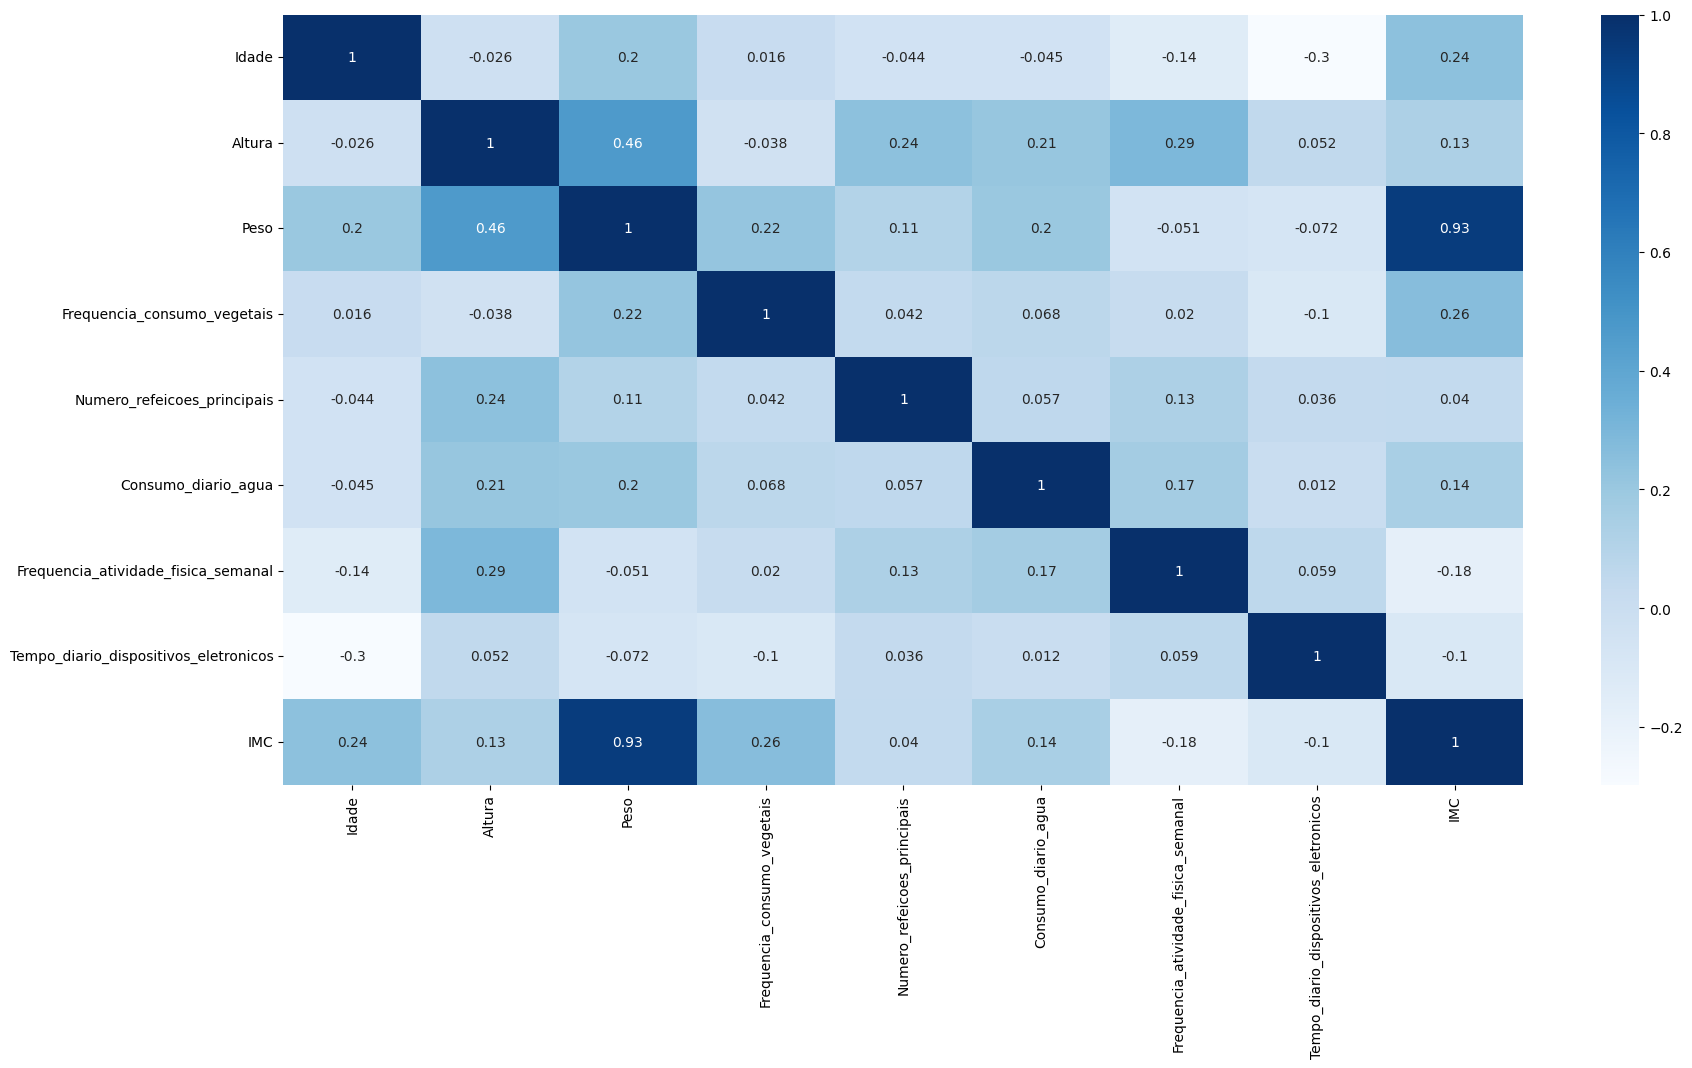

In [21]:
corr = df_obesidade.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='Blues', annot=True)

In [22]:
mulheres = df_obesidade[df_obesidade['Sexo_biologico'] == 'Feminino']

In [23]:
homens = df_obesidade[df_obesidade['Sexo_biologico'] == 'Masculino']

In [24]:
df_obesidade[['Idade', 'Altura', 'Peso', 'IMC']].describe().round(2)

,Idade,Altura,Peso,IMC
count,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,29.70
std,6.35,0.09,26.19,8.01
min,14.00,1.45,39.00,13.00
25%,19.95,1.63,65.47,24.32
50%,22.78,1.70,83.00,28.72
75%,26.00,1.77,107.43,36.02
max,61.00,1.98,173.00,50.81


In [25]:
mulheres.describe().round(2)[['Idade', 'Altura', 'Peso', 'IMC']]

,Idade,Altura,Peso,IMC
count,1043.00,1043.00,1043.00,1043.00
mean,24.00,1.64,82.30,30.13
std,6.41,0.07,29.72,9.40
min,15.00,1.45,39.00,13.00
25%,19.63,1.60,58.00,22.36
50%,22.00,1.64,78.00,28.47
75%,26.00,1.70,105.04,40.08
max,61.00,1.84,165.06,50.81


In [26]:
homens[['Idade', 'Altura', 'Peso', 'IMC']].describe().round(2)

,Idade,Altura,Peso,IMC
count,1068.00,1068.00,1068.00,1068.00
mean,24.62,1.76,90.77,29.28
std,6.27,0.07,21.41,6.35
min,14.00,1.56,45.00,13.29
25%,20.00,1.71,75.00,25.57
50%,23.00,1.76,89.95,28.90
75%,27.93,1.81,108.46,35.22
max,56.00,1.98,173.00,49.47


In [27]:
def plot_hist(df, var, titulo, cor, ax=None):
    if ax is None:
        ax = plt.gca()
    sns.histplot(df[var], bins=20, kde=True, alpha=0.5, color=cor, ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequência')
    ax.grid(True, linestyle='--', alpha=0.5)
    valor_medio = df[f'{var}'].mean()
    ax.axvline(valor_medio, color='red', linestyle='--', linewidth=1.5, label=f'Média: {valor_medio:.2f}')
    ax.legend()


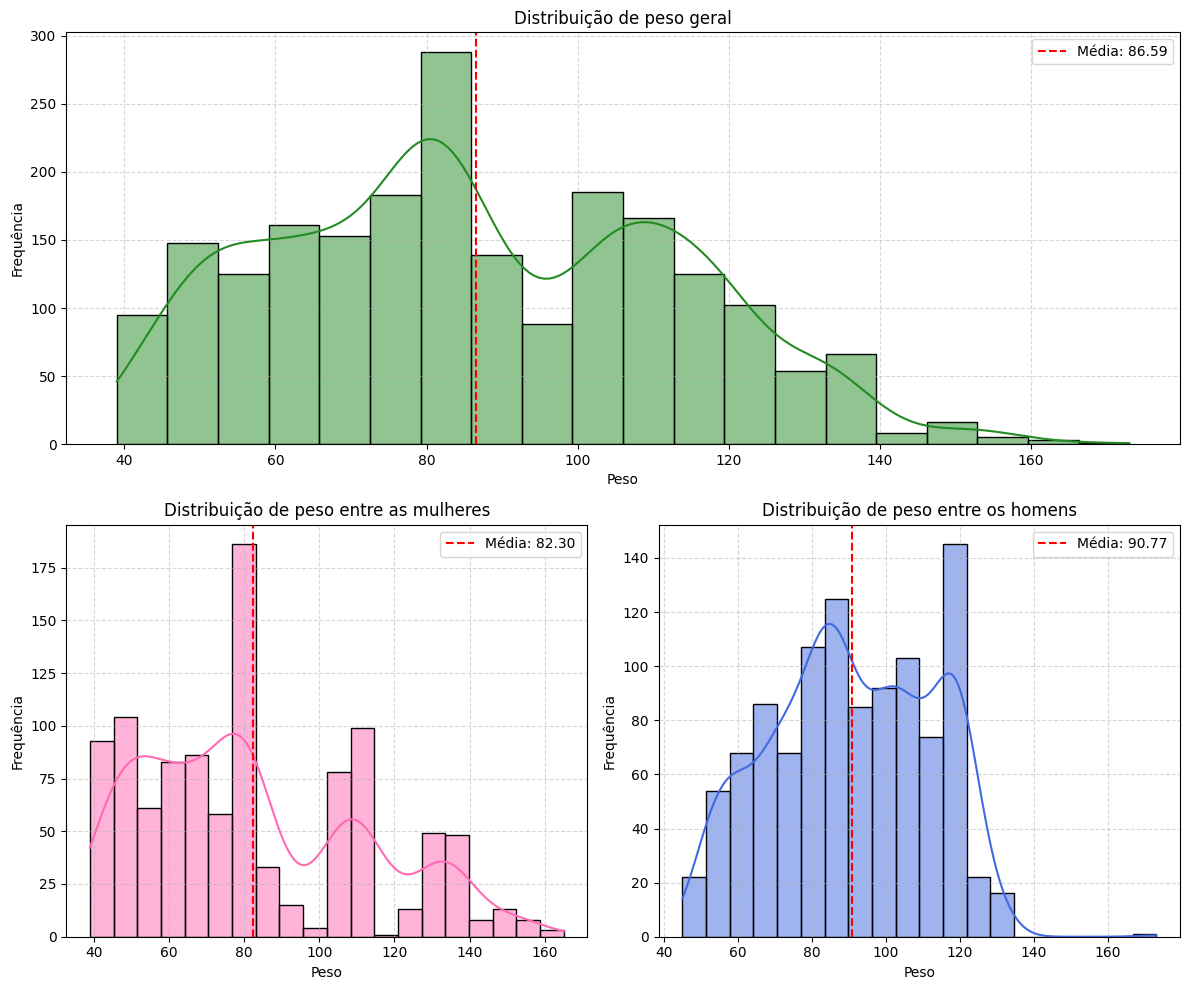

In [28]:
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

plot_hist(df_obesidade, 'Peso', 'Distribuição de peso geral', 'forestgreen', ax=ax0)
plot_hist(mulheres, 'Peso', 'Distribuição de peso entre as mulheres', 'hotpink', ax=ax1)
plot_hist(homens, 'Peso', 'Distribuição de peso entre os homens', 'royalblue', ax=ax2)

plt.tight_layout()
plt.show()

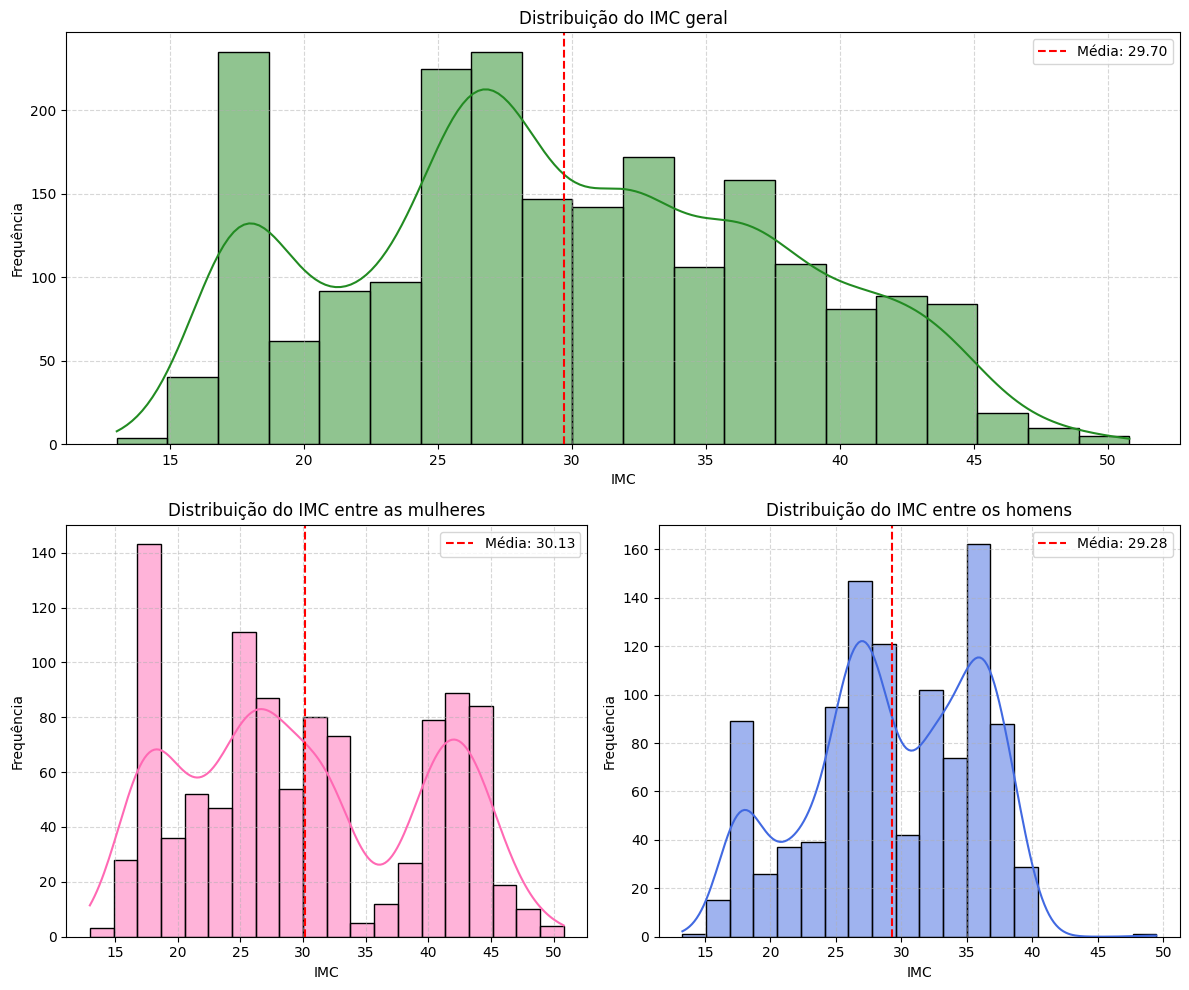

In [29]:
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

plot_hist(df_obesidade, 'IMC', 'Distribuição do IMC geral', 'forestgreen', ax=ax0)
plot_hist(mulheres, 'IMC', 'Distribuição do IMC entre as mulheres', 'hotpink', ax=ax1)
plot_hist(homens, 'IMC', 'Distribuição do IMC entre os homens', 'royalblue', ax=ax2)

plt.tight_layout()
plt.show()

In [30]:
ordem = [
    'Abaixo_do_peso',
    'Peso_normal',
    'Sobrepeso_nivel_I',
    'Sobrepeso_nivel_II',
    'Obesidade_tipo_I',
    'Obesidade_tipo_II',
    'Obesidade_tipo_III'
]

In [31]:
freq_geral = df_obesidade['Nivel_obesidade'].value_counts().reindex(ordem, fill_value=0)
freq_mulheres = mulheres['Nivel_obesidade'].value_counts().reindex(ordem, fill_value=0)
freq_homens = homens['Nivel_obesidade'].value_counts().reindex(ordem, fill_value=0)

x = np.arange(len(ordem))
largura = 0.25

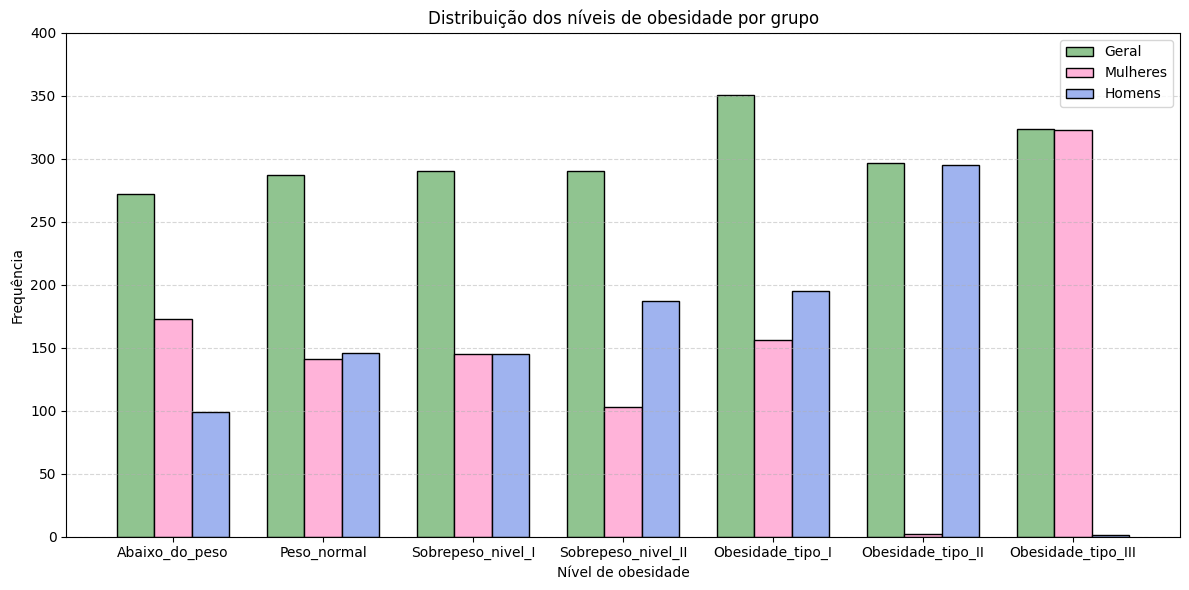

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

bars0 = ax.bar(x - largura, freq_geral, width=largura, label='Geral', color='#90c490', edgecolor='black')
bars1 = ax.bar(x, freq_mulheres, width=largura, label='Mulheres', color='#ffb3d9', edgecolor='black')
bars2 = ax.bar(x + largura, freq_homens, width=largura, label='Homens', color='#9fb3ef', edgecolor='black')

ax.set_ylabel('Frequência')
ax.set_xlabel('Nível de obesidade')
ax.set_title('Distribuição dos níveis de obesidade por grupo')
ax.set_xticks(x)
ax.set_xticklabels(ordem)
ax.legend()
ax.set_ylim(0, 400)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [33]:
def plot_bar(df, var, titulo, cor, ax=None):
    if ax is None:
        ax = plt.gca()
    sns.countplot(x=var, data=df, order=ordem, color=cor, ax=ax, edgecolor='black', linewidth=1.0)
    ax.set_ylim(0, 400)
    ax.set_title(titulo)
    ax.set_xlabel(None)
    ax.set_ylabel('Frequência')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

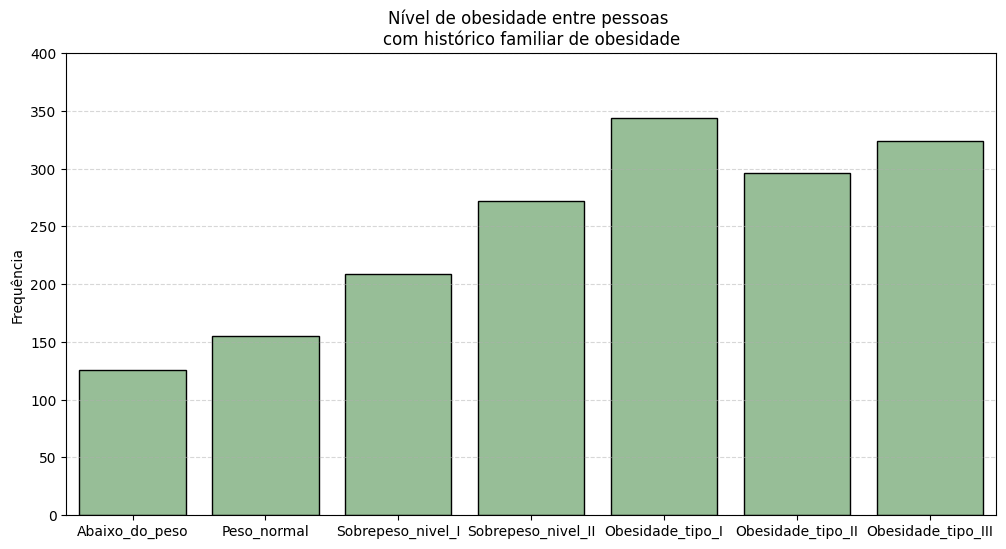

In [34]:
fig = plt.figure(figsize=(12, 6))

plot_bar(df_obesidade[df_obesidade['Historico_familiar_excesso_peso'] == 'Sim'], 'Nivel_obesidade','Nível de obesidade entre pessoas \ncom histórico familiar de obesidade', '#90c490', ax=None)

In [35]:
df_obesidade.to_csv('data/Obesidade.csv', index=False)

In [36]:
df_obesidade['Nivel_obesidade'].value_counts(normalize=True) * 100

Nivel_obesidade
Obesidade_tipo_I      16.627191
Obesidade_tipo_III    15.348176
Obesidade_tipo_II     14.069162
Sobrepeso_nivel_I     13.737565
Sobrepeso_nivel_II    13.737565
Peso_normal           13.595452
Abaixo_do_peso        12.884889
Name: proportion, dtype: float64

In [37]:
df_obesidade.columns

Index(['Sexo_biologico', 'Idade', 'Altura', 'Peso',
       'Historico_familiar_excesso_peso',
       'Consumo_frequente_alimentos_caloricos', 'Frequencia_consumo_vegetais',
       'Numero_refeicoes_principais', 'Consumo_lanches_entre_refeicoes',
       'Habito_fumar', 'Consumo_diario_agua',
       'Monitoramento_ingestao_calorica',
       'Frequencia_atividade_fisica_semanal',
       'Tempo_diario_dispositivos_eletronicos', 'Consumo_bebida_alcoolica',
       'Meio_transporte_habitual', 'Nivel_obesidade', 'IMC'],
      dtype='object')